#**Proyecto final. Memoria**

![](https://www.gigabitmagazine.com/sites/default/files/styles/slider_detail/public/topic/image/GettyImages-823686896.jpg?itok=fPBUHNBj)

 **Alumno:** Miguel Angel Ordoñez  
- **Correo:** alu0101281087@ull.edu.es  

**Alumno:** Óscar Moreira Estévez
- **Correo:** alu0101209067@ull.edu.es  

**Alumno:** Adal Díaz Fariña  
- **Correo:** alu0101112251@ull.edu.es  

**Asignatura:** Tratamiento de Datos inteligentes.

**Curso:** 3º del Grado en Ingeniería Informática. 

**Versión:** 
- 01/05/2020 | Inicio
- 08/05/2020 | Preprocesado de Datos
- 20/05/2020 | Clasificadores
- 25/05/2020 | Clustering
- 28/05/2020 | Retoques finales 
- 29/05/2020 | Arreglando fallos que nos comentaron en la presentación.

 

#**Índice**

* Introducción
  
  * Objetivos

  * Tecnologías

  * Librerías

  * Creación del Dataset

* Problemas con el dataset

* Preprocesado de datos
  
  * Convertir a valores binarios y categóricos

  * Outliers

  * Crear variable

  * Balancear

  * Normalizar

  * Seleccionar variables

* Clasificadores

  * Árbol de decisión
  
  * Clasificador Bayesiano

  * Comparación de árbol de decisión y clasificador bayesiano

* Clustering

  * K-means

  * Clustering jerárquico

  * Comparación de Kmeans y cluster jerárquico
  
* Conclusión

* Bibliografía


# **Introducción**
___

### **Objetivo** 



- ¿Podemos predecir que alumnos consumen alcohol y en qué medida?
- ¿Qué variables afectan al consumo del alcohol?
- ¿Cómo podemos reducir el consumo de alcohol en estudiantes?



- Dataframe : [enlace](https://www.kaggle.com/uciml/student-alcohol-consumption)

<br>

___


### **Tecnologías** 
**Lenguaje**: Python V3

**Entorno**: Google Colab

**Librerías**: 
  - Pandas: Tratamiento de los datos.
  - Scikit-learn: Machine learning. Construcción y evaluación de los modelos.
  - Plotly y Matplotlib: Gráficas  y representación de datos.


### **Librerías**

#### **Instalación de Librerías**
---

In [0]:
pip install matplotlib sklearn pandas numpy

#### **Cargamos las librerias**


In [0]:
import numpy as np
import pandas as pd
from numpy import where

#Matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap

#Plotly
import plotly.express as px
import plotly.graph_objects as go

#Sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score

import sklearn.metrics as sm
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Scipy
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, single, cophenet, fcluster

#Others
import seaborn as sns
from io import StringIO
from collections import Counter
from subprocess import check_call
from imblearn.over_sampling import SMOTENC
from IPython.display import Image as PImage

## **Creación de Dataset**
El dataset que utilizamos en el proyecto es una unión entre dos dataset. Decidimos utilizar los dos dataset en vez de uno para disponer de mayor cantidad de datos, ya que un dataset tiene 600 filas y otro 300 filas aproximadamente.

In [0]:
data_math = pd.read_csv('student-mat.csv', delimiter=',')
data_por = pd.read_csv('student-por.csv', delimiter=',')
frames = [data_math, data_por]
dataset_alumns = pd.concat(frames, ignore_index='True') 

dataset_alumns

school sex  age address famsize  ... health  absences  G1  G2  G3
0        GP   F   18       U     GT3  ...      3         6   5   6   6
1        GP   F   17       U     GT3  ...      3         4   5   5   6
2        GP   F   15       U     LE3  ...      3        10   7   8  10
3        GP   F   15       U     GT3  ...      5         2  15  14  15
4        GP   F   16       U     GT3  ...      5         4   6  10  10
...     ...  ..  ...     ...     ...  ...    ...       ...  ..  ..  ..
1039     MS   F   19       R     GT3  ...      5         4  10  11  10
1040     MS   F   18       U     LE3  ...      1         4  15  15  16
1041     MS   F   18       U     GT3  ...      5         6  11  12   9
1042     MS   M   17       U     LE3  ...      2         6  10  10  10
1043     MS   M   18       R     LE3  ...      5         4  10  11  11

[1044 rows x 33 columns]

## Significado de las variables

* **School:** Escuela del alumno (Binario)
  * 'GP': Gabriel Pereira
  * 'MS' - Mousinho da Silveira

* **Sex:** Sexo del alumno (Binario)
  * 'F': Femenino
  * 'M': Masculino)

* **Age:** Edad del alumno (Numérico)
  * De 15 a 22

* **Address:** Tipo de domicilio del estudiante (Binario)
  * 'U': Urbano
  * 'R' Rural

* **Famsize:** Tamaño de la familia (Binario)
  * 'LE3': Menor o igual a 3
  * 'GT3': Mayor que 3

* **Pstatus:** Estado de convivencia de los padres (binario) 
  * 'T': Viviendo juntos
  * 'A': Separados)

* **Medu:** Educación de la madre (Numérico)
  * 0: Ninguno
  * 1: Educación primaria (4to grado)
  * 2: 5to a 9no grado
  * 3: Educación secundaria
  * 4: Educación superior

* **Fedu:** - Educación del padre (Numérico)
  * 0: Ninguno
  * 1: Educación primaria (4to grado)
  * 2: 5to a 9no grado
  * 3: Educación secundaria
  * 4: Educación superior

* **Mjob:** Trabajo de la madre (Nominal)
  * 'teacher': Profesora
  * 'health': Relacionado con la salud
  * 'services': Por ejemplo cargos administrativos o policiales
  * 'at_home': Trabajos de hogar
  * 'other: Otro trabajo

* **Fjob:** - trabajo del padre (Nominal)
  * 'teacher': Profesor
  * 'health': Relacionado con la salud
  * 'services': Por ejemplo cargos administrativos o policiales
  * 'at_home': Trabajos de hogar
  * 'other: Otro trabajo


* **Reason:** Motivo para elegir esta escuela (Nominal)
  * 'hogar': Cercania del hogar
  * 'reputation': Reputación de la escuela
  * 'course': Preferencia por el curso o grupo
  * 'other': Otra razón

* **Guardian:** Tutor del alumno (Nominal)
  * 'mother': La tutora es la madre
  * 'father': El tutor es el padre
  * 'other': Tiene otro tutor que no es ni el padre ni la madre

* **Traveltime:** Tiempo de viaje del hogar a la escuela (Numérico) 
  * Cantidad de horas

* **Studytime:** Tiempo de estudio semanal (Numérico)
  * Cantidad de horas

* **Failures** Número de faltas a una clase (Numérico)
  * Cantidad de faltas, De 1 a 4

* **Schoolsup:** Apoyo educativo adicional (Binario)
  * Yes 
  * No

* **Famsup:** Apoyo educativo familiar (Binario) 
  * Yes 
  * No

* **Paid:** Clases particulares (Binario)
  * Yes 
  * No

* **Activities:** Actividades extracurriculares (Binario)
  * Yes 
  * No

* **Nursery:** Asistió a la guardería (Binario)
  * Yes 
  * No

* **Higher**: Quiere cursar estudios superiores (Binario)
  * Yes 
  * No

* **Internet:**: Acceso a Internet en el hogar (Binario)
  * Yes 
  * No

* **Romantic:** Con una relación romántica (Binario)
  * Yes 
  * No

* **Famrel:** Calidad de las relaciones familiares (Numérico)
  * 1: Muy mala
  * 2: Mala
  * 3: Regular
  * 4: Buena
  * 5: Excelente

* **Freetime:** * Tiempo libre después de la escuela (Numérico)
  * 1: Muy bajo
  * 2: Bajo
  * 3: Regular
  * 4: Alto
  * 5: Muy alto

* **Goout** Salir con amigos (Numérico)
  * 1: Muy bajo
  * 2: Bajo
  * 3: Regular
  * 4: Alto
  * 5: Muy alto

* **Dalc:** Consumo de alcohol en la jornada laboral (Numérico) 
  * 1: Muy bajo
  * 2: Bajo
  * 3: Regular
  * 4: Alto
  * 5: Muy alto

* **Walc:** Consumo de alcohol de fin de semana (Numérico)
  * 1: Muy bajo
  * 2: Bajo
  * 3: Regular
  * 4: Alto
  * 5: Muy alto

* **Health:** Estado de salud actual (Numérico)
  * 1: Muy bajo
  * 2: Bajo
  * 3: Regular
  * 4: Alto
  * 5: Muy alto

* **Absences:** Número de ausencias escolares (Numérico)
  *  Rango de 0 a 93

* **G1:** Calificación del primer período (Numérico)
  *  Rango de 0 a 20

* **G2:** Calificación del segundo período (Numérico)
  *  Rango de 0 a 20

* **G3:** Calificación final (Numérico)
  *  Rango de 0 a 20

# Problemas

En primer lugar, antes de empezar con el preprocesador de datos vamos a ver que tenemos en el dataset y analizar los posibles problemas que podemos encontrarnos. 
Al mostrar el dataset, de entrada nos damos cuenta que disponemos mayormente de variables catefóricas y que todas las variables no son numéricas.

In [0]:
dataset_alumns.describe()

age         Medu  ...           G2           G3
count  1044.000000  1044.000000  ...  1044.000000  1044.000000
mean     16.726054     2.603448  ...    11.246169    11.341954
std       1.239975     1.124907  ...     3.285071     3.864796
min      15.000000     0.000000  ...     0.000000     0.000000
25%      16.000000     2.000000  ...     9.000000    10.000000
50%      17.000000     3.000000  ...    11.000000    11.000000
75%      18.000000     4.000000  ...    13.000000    14.000000
max      22.000000     4.000000  ...    19.000000    20.000000

[8 rows x 16 columns]

Al hacerle un describe a nuestro dataset podemos observar que hay variables que se mueven en escalas mucho más grandes y esto podría afectarnos a la hora de realizar los algortimos de clusterización.

In [0]:
dataset_alumns.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Al realizar un dtype nos damos cuenta que no disponemos solo de variables numéricas aunque esto tambien podíamos observarlos a la hora de mostrar el dataset que creamos. 

In [0]:
dataset_alumns.isnull().values.any()

False

Este método que nos devuelve False comprueba si hay valores nulos en nuestro dataframe. Como podemos ver no tenemos valores nulos así que podremos olvidarnos de tener que tratarlos.

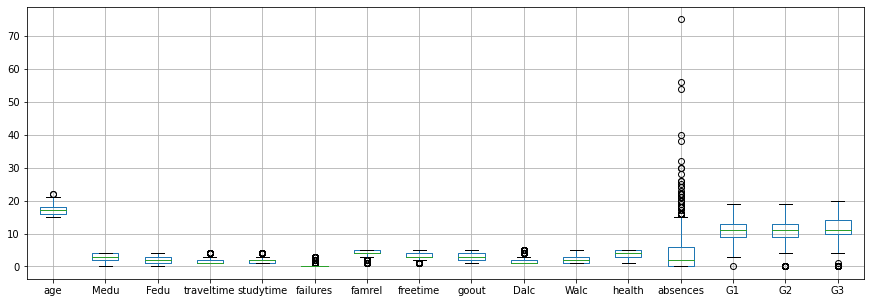

In [0]:
dataset_alumns.boxplot()

Luego al gráficar nuestro dataframe en una grafico de cajas y bigotes, nos damos cuenta de que tenemos que tratar los outliers

Por último al indagar con las variables que tenemos en el dataset nos damos cuenta que tenemos muchísimas y que no tenemos una variable objetivo, tenemos dos:  el consumo de alcohol entre semana(Dalc) y el consumo de alcohol los fines de semana(Walc). Por lo que más adelante las uniremos en una sola variable objetivo. Esto con lleva a su vez a comprobar si las clases están balanceadas y si no es así hay que tratarlas. Y bueno para no utilizar todas las variables analizaremos cuáles son las más relevantes para nuestro estudio.



En resumen los problemas que tenemos en nuestro dataset son:

1. Las variables no son numéricas
2. Tenemos que tratar los outliers
3. Tenemos que normalizar
4. Unir dos variables para crear la variable objetivo
5. Comprobar si las clases quedan balanceadas y sino balancearlas
6. Elegir las variables más relevantes

# Preprocesado
Una vez analizado los problemas que tenemos vamos a tratarlos en este apartado.

## Convertir a valores binarios y categóricos
Como comentamos en el apartado de problemática disponemos de variables categóricas y binarias. El problemas es que no son numéricas las variables binarias y que las variables categóricas no se pueden escalar. A que nos referimos con que no se pueden esacalar. Vamos a verlo con un ejemplo. La variable Fjob(Trabajo del padre) por ejemplo tiene como valores una serie de trabajos. Si sustituyeramos cada trabajo por un número es una cierta escala estaríamos diciendo que un trabajo tiene más importancia que otro, lo que no es cierto. Vamos a ver como tratarlo. 

In [0]:
data_mod_var = dataset_alumns.copy()
data_mod_var

school sex  age address famsize  ... health  absences  G1  G2  G3
0        GP   F   18       U     GT3  ...      3         6   5   6   6
1        GP   F   17       U     GT3  ...      3         4   5   5   6
2        GP   F   15       U     LE3  ...      3        10   7   8  10
3        GP   F   15       U     GT3  ...      5         2  15  14  15
4        GP   F   16       U     GT3  ...      5         4   6  10  10
...     ...  ..  ...     ...     ...  ...    ...       ...  ..  ..  ..
1039     MS   F   19       R     GT3  ...      5         4  10  11  10
1040     MS   F   18       U     LE3  ...      1         4  15  15  16
1041     MS   F   18       U     GT3  ...      5         6  11  12   9
1042     MS   M   17       U     LE3  ...      2         6  10  10  10
1043     MS   M   18       R     LE3  ...      5         4  10  11  11

[1044 rows x 33 columns]

Bueno para las variables binarias sustituimos sus valores por valores numéricos con diccionarios en python.

In [0]:
sex = {'M': 0, 'F': 1}
address = {'U': 0, 'R': 1}
Pstatus = {'T': 0, 'A': 1}
school = {'GP': 0, 'MS': 1}
famsize = {'LE3': 0, 'GT3': 1}
schoolsup = {'no': 0, 'yes': 1}
famsup = {'no': 0, 'yes': 1}
paid = {'no': 0, 'yes': 1}
activities = {'no': 0, 'yes': 1}
nursery = {'no': 0, 'yes': 1}
higher = {'no': 0, 'yes': 1}
internet = {'no': 0, 'yes': 1}
romantic = {'no': 0, 'yes': 1}

In [0]:
data_mod_var.sex = [sex[item] for item in data_mod_var.sex]
data_mod_var.address = [address[item] for item in data_mod_var.address]
data_mod_var.Pstatus = [Pstatus[item] for item in data_mod_var.Pstatus]
data_mod_var.school = [school[item] for item in data_mod_var.school]     
data_mod_var.famsize = [famsize[item] for item in data_mod_var.famsize]     
data_mod_var.schoolsup = [schoolsup[item] for item in data_mod_var.schoolsup]     
data_mod_var.famsup = [famsup[item] for item in data_mod_var.famsup]     
data_mod_var.paid = [paid[item] for item in data_mod_var.paid]     
data_mod_var.activities = [activities[item] for item in data_mod_var.activities]     
data_mod_var.nursery = [nursery[item] for item in data_mod_var.nursery]     
data_mod_var.higher = [higher[item] for item in data_mod_var.higher]
data_mod_var.internet = [internet[item] for item in data_mod_var.internet]
data_mod_var.romantic = [romantic[item] for item in data_mod_var.romantic]     

Y para las variables categóricas como no podíamos sustituirlas por números creamos variables binarias por cada valor de la variable categórica. Es decir si la variable categórica disponia de 5 valores, ahora por esa variable vamos a tener 5 variables más binarias. Uno indica que ese característica esta presente y cero que no.

In [0]:
data_mod_var = pd.get_dummies(data_mod_var)

In [0]:
data_mod_var

school  sex  age  ...  guardian_father  guardian_mother  guardian_other
0          0    1   18  ...                0                1               0
1          0    1   17  ...                1                0               0
2          0    1   15  ...                0                1               0
3          0    1   15  ...                0                1               0
4          0    1   16  ...                1                0               0
...      ...  ...  ...  ...              ...              ...             ...
1039       1    1   19  ...                0                1               0
1040       1    1   18  ...                0                1               0
1041       1    1   18  ...                0                1               0
1042       1    0   17  ...                0                1               0
1043       1    0   18  ...                0                1               0

[1044 rows x 46 columns]

## Outliers

Dentro del analisis de outliers podemos visualizar que tenemos bastantes valores que se salen de lo normal. Una técnica muy común es eliminar estos outliers para que no nos afecten la hora de la presición de nuestros algoritmos. Pero si eliminamos los outliers nos conjunto de datos se ve muy reducido por lo que decidimos utilizar otra técnica que es la de añadir los outliers a los valores limites. Un ejemplo de esto seria como si tuvieramos una encuesta que va de uno a cinco y el valor cinco seria cinco o más. Acercamos al limite superior los outliers que sobrepasan por arriba y al limite inferior los que sobrepasan por debajo.

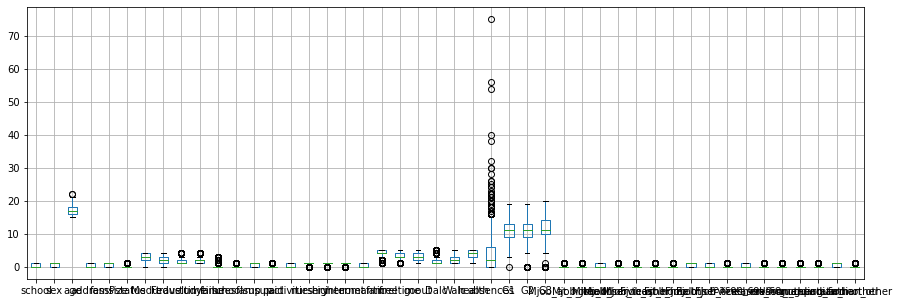

In [0]:
data_mod_var.boxplot()

Aquí podemos ver en detalle la variable absences (inasistencias). Que es la que mas outliers tiene.

In [0]:
import plotly.express as px
data_temp = data_mod_var.copy()
fig = px.box(data_temp, y="absences")
fig.show()

¿Como conseguimos llevar los outliers a los limites? Pues lo que hacemos es igualar todos los valores por encima del cuantil 0.95 a este cuantil y los que están por debajo del cuantil 0.05 a este cuantil.

In [0]:
data_without_outliers = data_mod_var.copy()
for col in data_without_outliers.columns:
    percentiles = data_without_outliers[col].quantile([0.05,0.95]).values
    data_without_outliers[col] = np.clip(data_without_outliers[col], percentiles[0], percentiles[1])

In [0]:
data_without_outliers.describe()

school          sex  ...  guardian_mother  guardian_other
count  1044.000000  1044.000000  ...      1044.000000     1044.000000
mean      0.260536     0.566092  ...         0.697318        0.069923
std       0.439138     0.495850  ...         0.459639        0.255140
min       0.000000     0.000000  ...         0.000000        0.000000
25%       0.000000     0.000000  ...         0.000000        0.000000
50%       0.000000     1.000000  ...         1.000000        0.000000
75%       1.000000     1.000000  ...         1.000000        0.000000
max       1.000000     1.000000  ...         1.000000        1.000000

[8 rows x 46 columns]

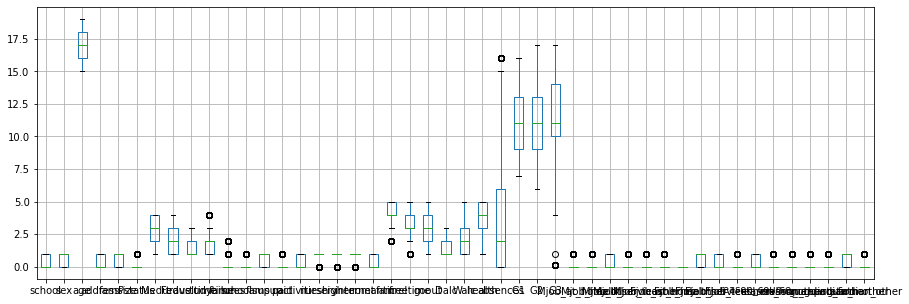

In [0]:
data_without_outliers.boxplot()

In [0]:
import plotly.express as px
data_temp = data_without_outliers.copy()
fig = px.box(data_temp, y="absences")
fig.show()

## Crear variable

Vamos a la variable objetivo. ¿Qué critério vamos a seguir para ello? Bueno como disponemos de la variable alcohol entre semana (Dalc) y alchol los fines de semana (Walc),vamos a relacionarlas con las siguiente fórmula:

$$(5 * Dalc + 2 * Walc)  /  7$$

Multiplicamos por 5 por 5 dias que tiene la semana y 2 por los 2 dias que tienen los fines de semana. Y por útimo dividimos entre 7 para calcular el consumo de alcohol entre semana.


In [0]:
def printDataframeByClass(df):
  print(df.shape)
  print(pd.value_counts(df['Class'], sort = True))

La función printDataframeByClass nos va a devolver el número de datos que hay que cada clase. Así podemos comprobar si luego de crear la variable objetivo, están balanceadas las clases.

In [0]:
#data_with_class = data_mod_var.copy()
data_with_class = data_without_outliers.copy()

Vamos a crear la nueva variable

In [0]:
data_with_class['Class'] = 0

row_count = len(dataset_alumns)

for i in range(row_count):
  count_alcohol = (5 * data_with_class['Dalc'][i] + 2 * data_with_class['Walc'][i])//7
  if (count_alcohol <= 1):
    data_with_class['Class'][i] = 'Bajo'
  elif (count_alcohol <= 2):
    data_with_class['Class'][i] = 'Medio'
  else:
    data_with_class['Class'][i] = 'Alto'

data_with_class = data_with_class.drop('Dalc', axis=1)
data_with_class = data_with_class.drop('Walc', axis=1)

printDataframeByClass(data_with_class)

(1044, 45)
Bajo     722
Medio    209
Alto     113
Name: Class, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is tr

Podemos comprobar que luego de crear la variable objetivo (Class), las clases no están balanceadas. Vamos a arreglarlo.

In [0]:
data_with_class

school  sex  age  ...  guardian_mother  guardian_other  Class
0          0    1   18  ...                1               0   Bajo
1          0    1   17  ...                0               0   Bajo
2          0    1   15  ...                1               0  Medio
3          0    1   15  ...                1               0   Bajo
4          0    1   16  ...                0               0   Bajo
...      ...  ...  ...  ...              ...             ...    ...
1039       1    1   19  ...                1               0   Bajo
1040       1    1   18  ...                1               0   Bajo
1041       1    1   18  ...                1               0   Bajo
1042       1    0   17  ...                1               0   Alto
1043       1    0   18  ...                1               0   Alto

[1044 rows x 45 columns]

## Balancear

A la hora de balancear probamos diferentes alternativas como: 
- Aumentar clase minoritaria. Está técnica generaba duplicidad en las clases minoritarias con el objetivo de alcanzar la clase minoritaria. Teníamos buenos resultados con el modelo de prueba pero no eran valores reales.
- Disminuir la clase mayoritaria. Este método reducia el conjunto de datos al de la clase más pequeña. Por lo que nuestro conjunto de datos se veía mermado.
- Aumentar la clase minoritaria con SMOTENC. Al final nos decantamos por este método debido a que no generaba duplicidad y conseguiamos aumentar nuestros datos. 

Esta función write_cm es un extra al proyecto. No es que calcule la matriz de confusión sino que la visualiza de manera más atractiva.

In [0]:
def write_cm(cm, name):
  sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('Clase verdadera')
  plt.ylabel('Clase predecida')
  plt.title(name)
  plt.show()

Antes de comenzar a balancear las clases creamos esta función para comprobar como es capaz de clasificar un modelo con nuestro datos ya balanceados. En este caso con árbol de clasificación. 

Una vez balanceemos los datos solo tenemos que llamar a esta función

In [0]:
def calculateClassifier(df):
  predictors = df.drop('Class', axis=1)
  targets = df.Class
  pred_train, pred_val, tar_train, tar_val = train_test_split(predictors, targets, test_size=0.3, random_state=0, shuffle=True)

  classifier = DecisionTreeClassifier(criterion='entropy',min_samples_split=20, min_samples_leaf=10)
  model = classifier.fit(pred_train,tar_train)

  acc_decision_tree_train = round(classifier.score(pred_train, tar_train) * 100, 2)
  print("Train accuracy: %.3f%%" % acc_decision_tree_train)

  acc_decision_tree_train = round(classifier.score(pred_val, tar_val) * 100, 2)
  print("Valid accuracy: %.3f%%" % acc_decision_tree_train)

  y_pred_tar = classifier.predict(pred_train)
  y_pred_val = classifier.predict(pred_val)

  cm_train = confusion_matrix(tar_train, y_pred_tar)
  write_cm(cm_train , "Train Confusion matrix : ")

  cm_valid = confusion_matrix(tar_val, y_pred_val)
  write_cm(cm_valid, "Valid Confusion matrix : ")

  print("Train classification report:")
  print(classification_report(tar_train, y_pred_tar))
  print("Valid classification report:")
  print(classification_report(tar_val, y_pred_val))

### Aumentar clase minoritaria con SMOTENC



In [0]:
data_equiv = data_with_class.copy()
data_equiv

school  sex  age  ...  guardian_mother  guardian_other  Class
0          0    1   18  ...                1               0   Bajo
1          0    1   17  ...                0               0   Bajo
2          0    1   15  ...                1               0  Medio
3          0    1   15  ...                1               0   Bajo
4          0    1   16  ...                0               0   Bajo
...      ...  ...  ...  ...              ...             ...    ...
1039       1    1   19  ...                1               0   Bajo
1040       1    1   18  ...                1               0   Bajo
1041       1    1   18  ...                1               0   Bajo
1042       1    0   17  ...                1               0   Alto
1043       1    0   18  ...                1               0   Alto

[1044 rows x 45 columns]

Este función lo que hace es crear nuevos datos haciendo pequeñas modificaciones en los valores que disponemos. Sin embargo, estas variaciones son valores decimales por lo que, excluimos las variables que deben ser valores enteros. 

Se pueden ver las columnas que fueron tratadas con variaciones con valores enteros.

In [0]:
def equivClass(df):
  X = df.drop('Class', axis = 1)
  y = df['Class']

  counter = Counter(y)
  print(counter)

  firstList = list(range(0,8))
  secondList = list(range(10,19))
  thirdList = list(range(27,44))

  finalList = []
  finalList.extend(firstList)
  finalList.extend(secondList)
  finalList.extend(thirdList)
  finalList.append(23)

  oversample = SMOTENC(categorical_features=finalList)

  print(finalList)


  X, y = oversample.fit_resample(X, y)

  counter = Counter(y)
  print(counter)

  columns_select = [
  'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime',
  'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
  'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health', 
  'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 
  'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 
  'guardian_father', 'guardian_mother', 'guardian_other'
  ]

  newDf = pd.DataFrame (X, columns = columns_select)
  newDf['Class'] = y

  return newDf

In [0]:
data_equiv2 = equivClass(data_equiv)

Counter({'Bajo': 722, 'Medio': 209, 'Alto': 113})
[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 23]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({'Bajo': 722, 'Medio': 722, 'Alto': 722})


Aunque arriba equilibramos, la clase más alta no dispone de valores decimales debido a que la función no modifico sus valores por lo que seleccionamos de manera aleatoria 400 datos que representan alrededor del 50% de la clase 'Bajo'(La clase que inicialmente era mayoritaria) y ejecutamos de nuevo el balanceo de clases. Esto lo hicimos debido a que para el K-means necesitamos valores continuos.

In [0]:
df_bajo_2 = data_equiv2[data_equiv2.Class == 'Bajo'].copy()
df_medio_2 = data_equiv2[data_equiv2.Class == 'Medio'].copy()
df_alto_2 = data_equiv2[data_equiv2.Class == 'Alto'].copy()

size_elements = 400
df_bajo_under = df_bajo_2.sample(size_elements)

df_alto_2.reset_index(drop=True, inplace=True)
df_medio_2.reset_index(drop=True, inplace=True)
df_bajo_under.reset_index(drop=True, inplace=True)

frames = [df_bajo_under, df_medio_2, df_alto_2]
data_equiv_under = pd.concat(frames, ignore_index='True')

printDataframeByClass(data_equiv_under)

(1844, 45)
Alto     722
Medio    722
Bajo     400
Name: Class, dtype: int64


In [0]:
data_equiv3 = equivClass(data_equiv_under)

Counter({'Medio': 722, 'Alto': 722, 'Bajo': 400})
[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 23]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({'Bajo': 722, 'Medio': 722, 'Alto': 722})


Como podemos comprobar los datos han quedado balanceados. Pero no basta con comprobar si los datos han quedado balanceados o no. También debemos comprobar si hay duplicidad en los datos.

Comprobamos la duplicidad de los datos. 

In [0]:
data = data_equiv3[data_equiv3.Class == 'Alto']
list_values = data.duplicated()
list_values.value_counts()

False    720
True       2
dtype: int64

In [0]:
data = data_equiv3[data_equiv3.Class == 'Medio']
list_values = data.duplicated()
list_values.value_counts()

False    721
True       1
dtype: int64

In [0]:
data = data_equiv3[data_equiv3.Class == 'Bajo']
list_values = data.duplicated()
list_values.value_counts()

False    721
True       1
dtype: int64

Como podemos ver en cada clase hay uno o ningún elemento duplicado, pero esto es normal. Es debido a que al hacer pequeña modificaciones en los valores para sacar datos nuevos justo ha concidido con algunos de los que ya existían.

Esto son los resultados de nuestros datos **sin** balancear

Train accuracy: 79.450%
Valid accuracy: 60.190%


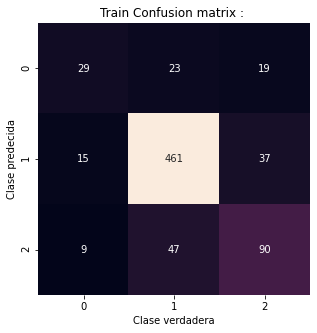

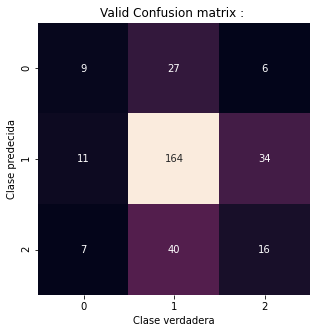

Train classification report:
              precision    recall  f1-score   support

        Alto       0.55      0.41      0.47        71
        Bajo       0.87      0.90      0.88       513
       Medio       0.62      0.62      0.62       146

    accuracy                           0.79       730
   macro avg       0.68      0.64      0.66       730
weighted avg       0.79      0.79      0.79       730

Valid classification report:
              precision    recall  f1-score   support

        Alto       0.33      0.21      0.26        42
        Bajo       0.71      0.78      0.75       209
       Medio       0.29      0.25      0.27        63

    accuracy                           0.60       314
   macro avg       0.44      0.42      0.43       314
weighted avg       0.57      0.60      0.59       314



In [0]:
calculateClassifier(data_with_class)

Vamos a analizar como funcionan nuestros datos déspues de haberlos balanceados. Como podemos observar la precisión de validación ha mejorado en 14% aproximadamente frente a la precisión de validación sin los datos balanceados.

Train accuracy: 82.120%
Valid accuracy: 73.850%


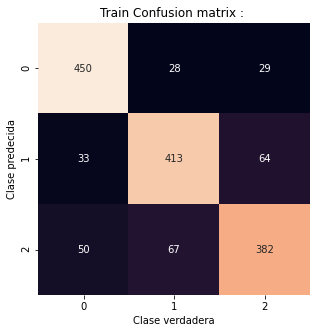

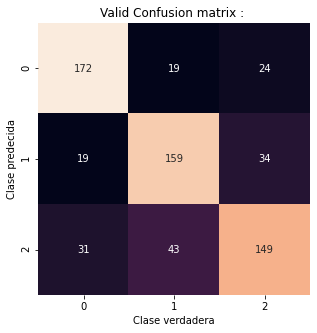

Train classification report:
              precision    recall  f1-score   support

        Alto       0.84      0.89      0.87       507
        Bajo       0.81      0.81      0.81       510
       Medio       0.80      0.77      0.78       499

    accuracy                           0.82      1516
   macro avg       0.82      0.82      0.82      1516
weighted avg       0.82      0.82      0.82      1516

Valid classification report:
              precision    recall  f1-score   support

        Alto       0.77      0.80      0.79       215
        Bajo       0.72      0.75      0.73       212
       Medio       0.72      0.67      0.69       223

    accuracy                           0.74       650
   macro avg       0.74      0.74      0.74       650
weighted avg       0.74      0.74      0.74       650



In [0]:
calculateClassifier(data_equiv3)

## Normalizar 
Como comentamos anteriormente vamos a trabajar con algoritmos que tienen encuenta las distancia por lo tanto debemos normalizar los valores para que todos se encuentren dentro de una misma escala. En nuestro caso normalizamos de 0 a 1.






In [0]:
columns_select = [
  'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime',
  'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
  'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health', 
  'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 
  'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 
  'guardian_father', 'guardian_mother', 'guardian_other'
]

data_equiv3

school  sex   age  ...  guardian_mother  guardian_other  Class
0        0.0  1.0  19.0  ...              0.0             1.0   Bajo
1        0.0  1.0  17.0  ...              1.0             0.0   Bajo
2        1.0  0.0  19.0  ...              1.0             0.0   Bajo
3        0.0  1.0  16.0  ...              0.0             0.0   Bajo
4        0.0  1.0  18.0  ...              0.0             0.0   Bajo
...      ...  ...   ...  ...              ...             ...    ...
2161     0.0  1.0  17.0  ...              1.0             0.0   Bajo
2162     0.0  1.0  18.0  ...              1.0             0.0   Bajo
2163     0.0  1.0  17.0  ...              1.0             0.0   Bajo
2164     0.0  1.0  18.0  ...              1.0             0.0   Bajo
2165     0.0  1.0  16.0  ...              1.0             0.0   Bajo

[2166 rows x 45 columns]

In [0]:
scaled_df = data_equiv3.copy()
scaled_df = scaled_df.drop('Class', axis=1)

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(scaled_df)
scaled_df = pd.DataFrame(scaled_df, columns=columns_select)
scaled_df['Class'] = data_equiv3['Class']

scaled_df

school  sex   age  ...  guardian_mother  guardian_other  Class
0        0.0  1.0  1.00  ...              0.0             1.0   Bajo
1        0.0  1.0  0.50  ...              1.0             0.0   Bajo
2        1.0  0.0  1.00  ...              1.0             0.0   Bajo
3        0.0  1.0  0.25  ...              0.0             0.0   Bajo
4        0.0  1.0  0.75  ...              0.0             0.0   Bajo
...      ...  ...   ...  ...              ...             ...    ...
2161     0.0  1.0  0.50  ...              1.0             0.0   Bajo
2162     0.0  1.0  0.75  ...              1.0             0.0   Bajo
2163     0.0  1.0  0.50  ...              1.0             0.0   Bajo
2164     0.0  1.0  0.75  ...              1.0             0.0   Bajo
2165     0.0  1.0  0.25  ...              1.0             0.0   Bajo

[2166 rows x 45 columns]

Mostrando la base de datos por encima podemos ver que los datos están normalizados. Vamos a comprobarlos con el describe.

In [0]:
scaled_df.describe()

school          sex  ...  guardian_mother  guardian_other
count  2166.000000  2166.000000  ...      2166.000000     2166.000000
mean      0.187904     0.382733  ...         0.797784        0.032318
std       0.390726     0.486166  ...         0.401745        0.176883
min       0.000000     0.000000  ...         0.000000        0.000000
25%       0.000000     0.000000  ...         1.000000        0.000000
50%       0.000000     0.000000  ...         1.000000        0.000000
75%       0.000000     1.000000  ...         1.000000        0.000000
max       1.000000     1.000000  ...         1.000000        1.000000

[8 rows x 44 columns]

Si nos fijamos en los valores máximos de cada variables podemos ver es 1 en todas y los valores mínimos son 0. Es decir, que el normalizado se ha realizado de manera correcta.

## Seleccionar variables
A la hora de seleccionar variables podemos seguir varios critérios. Uno es basar la selección de la variables sobre el criterío de un experto y la otra sería de forma analítica. Nosotros utilizamos la forma analítica. Utilizamos el algoritmo de **RandomForest** para seleccionar un grupo de variables y luego utilizamos la **matrix de correlación** para ver si teníamos variables correlacionadas.

In [0]:
data_select = scaled_df.copy()
data_select

school  sex   age  ...  guardian_mother  guardian_other  Class
0        0.0  1.0  1.00  ...              0.0             1.0   Bajo
1        0.0  1.0  0.50  ...              1.0             0.0   Bajo
2        1.0  0.0  1.00  ...              1.0             0.0   Bajo
3        0.0  1.0  0.25  ...              0.0             0.0   Bajo
4        0.0  1.0  0.75  ...              0.0             0.0   Bajo
...      ...  ...   ...  ...              ...             ...    ...
2161     0.0  1.0  0.50  ...              1.0             0.0   Bajo
2162     0.0  1.0  0.75  ...              1.0             0.0   Bajo
2163     0.0  1.0  0.50  ...              1.0             0.0   Bajo
2164     0.0  1.0  0.75  ...              1.0             0.0   Bajo
2165     0.0  1.0  0.25  ...              1.0             0.0   Bajo

[2166 rows x 45 columns]

¿Cómo vamos a sacar las variables del randomForest? El randomForest te va a devolver el mejor modelo con el mejor grupo de variables. Por lo que cuando nos devuelva el modelo vamos a extraer las variables que se usaron para el mismo.

In [0]:
predictors = data_select.drop('Class', axis=1)
targets = data_select.Class

pred_train, pred_val, tar_train, tar_val = train_test_split(predictors, targets, test_size=0.3, random_state=0, shuffle=True)

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(pred_train, tar_train)

sel.get_support()

selected_feat= pred_train.columns[(sel.get_support())]
print("Número de variables: ", len(selected_feat))

Número de variables:  16


Aquí podemos ver las variables que nos selecciona el randomForest

In [0]:
selected_feat

Index(['sex', 'age', 'famsize', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3',
       'reason_course'],
      dtype='object')

Vamos a graficar la importancia de cada variable de manera decreciente.

<Figure size 640x480 with 0 Axes>

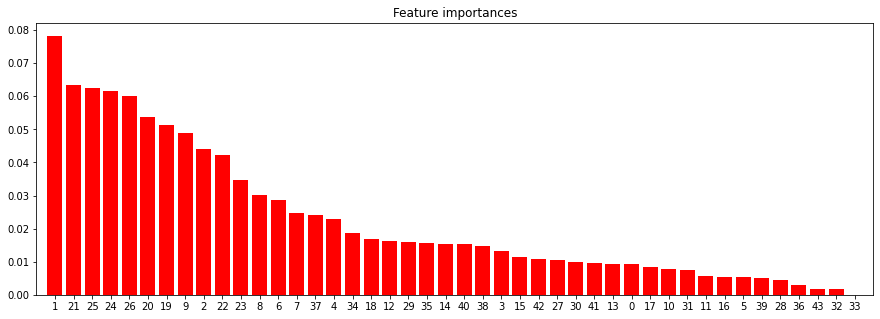

In [0]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
importances = sel.estimator_.feature_importances_
index = np.argsort(importances)[::-1]


importances_10 = importances[0:9]
index_10 = index[0:9]


plt.figure()
plt.title("Feature importances")
plt.bar(range(pred_train.shape[1]), importances[index],
       color="r", align="center")
plt.xticks(range(pred_train.shape[1]), index)
plt.xlim([-1, pred_train.shape[1]])
plt.show()

Aqui vemos el orden de las 10 primeras variables

In [0]:
print(index_10)



[ 1 21 25 24 26 20 19  9  2]


y aquí visualizamos la importancia de cada uno.

In [0]:
print(importances_10)

[0.00928212 0.07822909 0.0441556  0.0131121  0.02295697 0.00539247
 0.028632   0.02477453 0.03003543]


In [0]:
final_data = data_select.copy()

selected =  [
             'sex', 'age', 'famsize', 'Medu', 'Fedu', 'traveltime', 'studytime',
              'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1',
              'G2', 'G3', 'Class'
            ]

final_data = final_data[selected]
final_data


sex   age  famsize      Medu  ...        G1        G2        G3  Class
0     1.0  1.00      1.0  0.333333  ...  0.444444  0.545455  0.643917   Bajo
1     1.0  0.50      1.0  1.000000  ...  0.444444  0.545455  0.762611   Bajo
2     0.0  1.00      1.0  0.666667  ...  0.000000  0.454545  0.525223   Bajo
3     1.0  0.25      1.0  0.666667  ...  0.444444  0.454545  0.643917   Bajo
4     1.0  0.75      1.0  0.333333  ...  0.888889  0.727273  0.821958   Bajo
...   ...   ...      ...       ...  ...       ...       ...       ...    ...
2161  1.0  0.50      1.0  1.000000  ...  0.592958  0.666966  0.782589   Bajo
2162  1.0  0.75      1.0  0.666667  ...  0.770678  0.636364  0.764507   Bajo
2163  1.0  0.50      1.0  0.000000  ...  0.222586  0.363636  0.584570   Bajo
2164  1.0  0.75      1.0  0.333333  ...  0.048281  0.000000  0.000000   Bajo
2165  1.0  0.25      1.0  1.000000  ...  0.777778  0.662995  0.821958   Bajo

[2166 rows x 17 columns]

### Correlación
Este es el último paso en el preprocesado de datos que vamos a realizar. Consiste en comprobar si las variables que nos seleccionó randomForest están correlacionadas o no.

In [0]:
df_cor = final_data.copy()
df_cor

sex   age  famsize      Medu  ...        G1        G2        G3  Class
0     1.0  1.00      1.0  0.333333  ...  0.444444  0.545455  0.643917   Bajo
1     1.0  0.50      1.0  1.000000  ...  0.444444  0.545455  0.762611   Bajo
2     0.0  1.00      1.0  0.666667  ...  0.000000  0.454545  0.525223   Bajo
3     1.0  0.25      1.0  0.666667  ...  0.444444  0.454545  0.643917   Bajo
4     1.0  0.75      1.0  0.333333  ...  0.888889  0.727273  0.821958   Bajo
...   ...   ...      ...       ...  ...       ...       ...       ...    ...
2161  1.0  0.50      1.0  1.000000  ...  0.592958  0.666966  0.782589   Bajo
2162  1.0  0.75      1.0  0.666667  ...  0.770678  0.636364  0.764507   Bajo
2163  1.0  0.50      1.0  0.000000  ...  0.222586  0.363636  0.584570   Bajo
2164  1.0  0.75      1.0  0.333333  ...  0.048281  0.000000  0.000000   Bajo
2165  1.0  0.25      1.0  1.000000  ...  0.777778  0.662995  0.821958   Bajo

[2166 rows x 17 columns]

Visualizamos la matriz de correlación

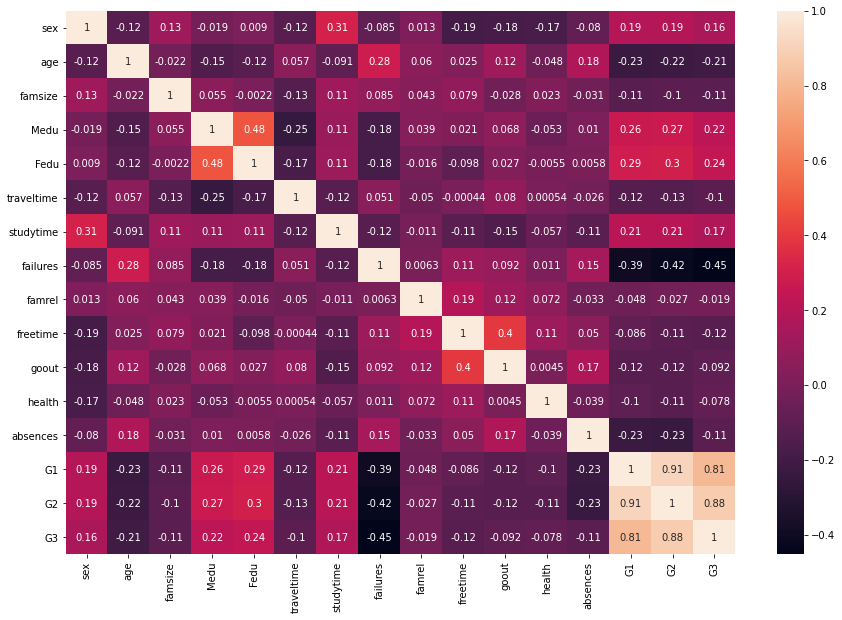

In [0]:
plt.figure(figsize=(15,10))
ax=plt.subplot(111)

corrMatrix = df_cor.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

Como podemos ver G1, G2 y G3 están muy correlacionadas. Esto tiene sentido ya que G3 es la media de G1 y G2 y las notas del último trimestre. Por lo tanto, eliminamos G1 y G2 ya que nos brindan más información relevante.

In [0]:
selected =  [
             'sex', 'age', 'famsize', 'Medu', 'Fedu', 'traveltime', 'studytime',
              'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G3', 'Class'
            ]

final_data = df_cor[selected]
final_data

sex   age  famsize      Medu  ...    health  absences        G3  Class
0     1.0  1.00      1.0  0.333333  ...  0.500000     0.250  0.643917   Bajo
1     1.0  0.50      1.0  1.000000  ...  0.750000     0.000  0.762611   Bajo
2     0.0  1.00      1.0  0.666667  ...  0.500000     0.250  0.525223   Bajo
3     1.0  0.25      1.0  0.666667  ...  0.250000     0.250  0.643917   Bajo
4     1.0  0.75      1.0  0.333333  ...  0.250000     0.250  0.821958   Bajo
...   ...   ...      ...       ...  ...       ...       ...       ...    ...
2161  1.0  0.50      1.0  1.000000  ...  1.000000     0.125  0.782589   Bajo
2162  1.0  0.75      1.0  0.666667  ...  0.000000     0.250  0.764507   Bajo
2163  1.0  0.50      1.0  0.000000  ...  1.000000     0.000  0.584570   Bajo
2164  1.0  0.75      1.0  0.333333  ...  0.891367     0.000  0.000000   Bajo
2165  1.0  0.25      1.0  1.000000  ...  0.426765     0.625  0.821958   Bajo

[2166 rows x 15 columns]

Train accuracy: 80.010%
Valid accuracy: 67.080%


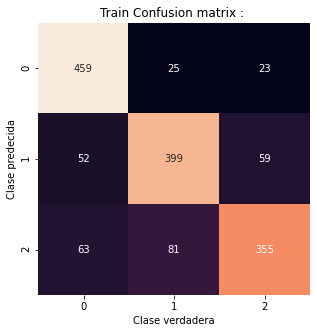

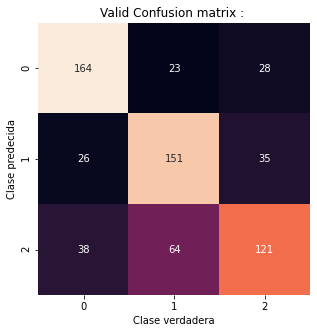

Train classification report:
              precision    recall  f1-score   support

        Alto       0.80      0.91      0.85       507
        Bajo       0.79      0.78      0.79       510
       Medio       0.81      0.71      0.76       499

    accuracy                           0.80      1516
   macro avg       0.80      0.80      0.80      1516
weighted avg       0.80      0.80      0.80      1516

Valid classification report:
              precision    recall  f1-score   support

        Alto       0.72      0.76      0.74       215
        Bajo       0.63      0.71      0.67       212
       Medio       0.66      0.54      0.59       223

    accuracy                           0.67       650
   macro avg       0.67      0.67      0.67       650
weighted avg       0.67      0.67      0.67       650



In [0]:
calculateClassifier(final_data)

#**Clasificadores**

##**Árbol de decisión**

Un árbol de decisión en nuestro un árbol de clasificación parte de un nodo raíz y va realizando subdivisiones a los datos hasta llegar a los nodos hojas o a la máxima profundidad del árbol.

###**Conjuntos de de entramiento y de validación**

Se utiliza el 70% de los datos para el conjunto de entrenamiento y el 30% para el de validación.

Con train_test_slip vamos a hacer un particionado y un barajado del conjunto. Baraja un poco el conjunto para que si tuvieramos un conjunto de datos ordenados no hubiera ningún problema. 

In [0]:
data_clean = final_data.copy()
data_clean

sex   age  famsize      Medu  ...    health  absences        G3  Class
0     1.0  1.00      1.0  0.333333  ...  0.500000     0.250  0.643917   Bajo
1     1.0  0.50      1.0  1.000000  ...  0.750000     0.000  0.762611   Bajo
2     0.0  1.00      1.0  0.666667  ...  0.500000     0.250  0.525223   Bajo
3     1.0  0.25      1.0  0.666667  ...  0.250000     0.250  0.643917   Bajo
4     1.0  0.75      1.0  0.333333  ...  0.250000     0.250  0.821958   Bajo
...   ...   ...      ...       ...  ...       ...       ...       ...    ...
2161  1.0  0.50      1.0  1.000000  ...  1.000000     0.125  0.782589   Bajo
2162  1.0  0.75      1.0  0.666667  ...  0.000000     0.250  0.764507   Bajo
2163  1.0  0.50      1.0  0.000000  ...  1.000000     0.000  0.584570   Bajo
2164  1.0  0.75      1.0  0.333333  ...  0.891367     0.000  0.000000   Bajo
2165  1.0  0.25      1.0  1.000000  ...  0.426765     0.625  0.821958   Bajo

[2166 rows x 15 columns]

In [0]:
predictors = data_clean.drop('Class', axis=1)
targets = data_clean.Class
pred_train, pred_val, tar_train, tar_val = train_test_split(predictors, targets, test_size=0.3, random_state=0, shuffle=True)

### **Entrenamiento del árbol del decisión**
Vamos a entrenar nuestro árbol con el conjunto de entrenamiento sin mirar ninguna otra variable y vamos a ver la presición que tiene nuestro árbol. Así luego podemos comprobar este modelo con el modelo optimizado y ver si vale la pena optimizarlo.


In [0]:
classifier = DecisionTreeClassifier(criterion='entropy',min_samples_split=20, min_samples_leaf=10)
model = classifier.fit(pred_train,tar_train)

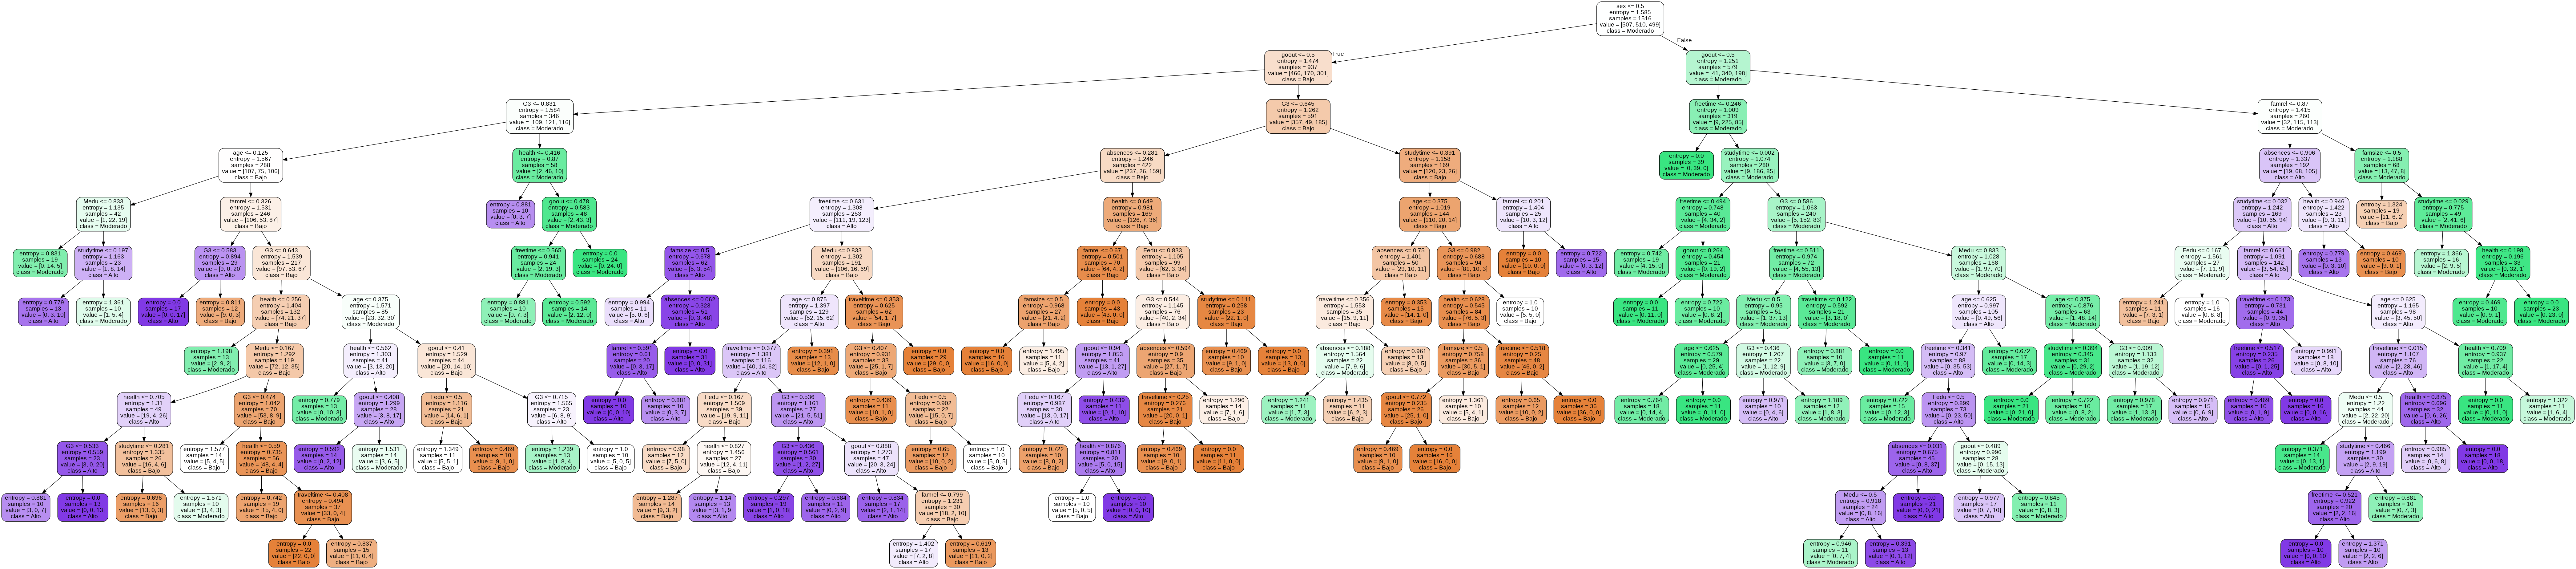

In [0]:
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(model,
                              out_file=f,
                              feature_names = list(data_clean.drop('Class', axis=1)),
                              class_names = ['Bajo', 'Moderado', 'Alto'],
                              rounded = True,
                              filled= True,
                              )

check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

Train accuracy: 80.010%
Valid accuracy: 66.920%


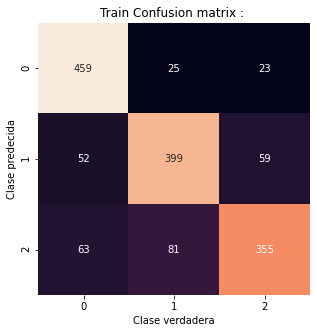

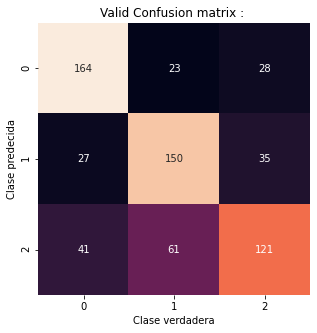

Train classification report:
              precision    recall  f1-score   support

        Alto       0.80      0.91      0.85       507
        Bajo       0.79      0.78      0.79       510
       Medio       0.81      0.71      0.76       499

    accuracy                           0.80      1516
   macro avg       0.80      0.80      0.80      1516
weighted avg       0.80      0.80      0.80      1516

Valid classification report:
              precision    recall  f1-score   support

        Alto       0.71      0.76      0.73       215
        Bajo       0.64      0.71      0.67       212
       Medio       0.66      0.54      0.59       223

    accuracy                           0.67       650
   macro avg       0.67      0.67      0.67       650
weighted avg       0.67      0.67      0.67       650



In [0]:
acc_decision_tree_train = round(classifier.score(pred_train, tar_train) * 100, 2)
print("Train accuracy: %.3f%%" % acc_decision_tree_train)

acc_decision_tree_train = round(classifier.score(pred_val, tar_val) * 100, 2)
print("Valid accuracy: %.3f%%" % acc_decision_tree_train)

y_pred_tar = classifier.predict(pred_train)
y_pred_val = classifier.predict(pred_val)

cm_train = confusion_matrix(tar_train, y_pred_tar)
write_cm(cm_train , "Train Confusion matrix : ")

cm_valid = confusion_matrix(tar_val, y_pred_val)
write_cm(cm_valid, "Valid Confusion matrix : ")

print("Train classification report:")
print(classification_report(tar_train, y_pred_tar))
print("Valid classification report:")
print(classification_report(tar_val, y_pred_val))

Podemos ver que la presición del árbol no es mala, pero vamos a intentar mejorarla.

### **Optimización del árbol de decisión**

Para optimizar nuestro árbol vamos a hacer uso de random forest y vamos a jugar con sus atributos. Luego de calcularlos todos vamos a quedarnos con el mejor.

¿Como funciona randomForest?

1. Seleciona una serie de variables de nuestro dataset
2. Cálcula una serie de árboles
3. Y luego calcula la precisión y las compara siendo el resultado el árbol con el pronóstico más alto

In [0]:
accuracies = []
bestModels = []
pred_list = []
acc_list = []
models = []
cm_list = []
cm_ = []

max_attributes = len(list(data_clean))
depth_range = range(1, max_attributes + 1)
split_list = [10,15,20,25,30,35,40]
split_leaf = [5,10]
comparador = 0

for depth in depth_range:
  for min_split in split_list:
    for min_leaf in split_leaf:
      fold_accuracy = [] 
      model = RandomForestClassifier(n_estimators = 10, criterion='entropy', max_depth =depth, min_samples_split=min_split, min_samples_leaf=min_leaf)
      models.append(model)
      model.fit(pred_train, tar_train)
      y_pred_val = model.predict(pred_val)
      cm_val = confusion_matrix(tar_val, y_pred_val)
      cm_list.append(cm_val)
      valid_acc = model.score(pred_val,tar_val)
      acc_list.append(valid_acc)
  it=0
  for acc in acc_list:
    if (comparador < acc):
      comparador = acc
      pos=it
    it += 1
  bestModels.append(models[pos])
  accuracies.append(acc_list[pos])
  cm_.append(cm_list[pos])


Mostras los resultados obtenidos. Los resultados la mejor precisión en el nivel de profundidad correspondiente.

In [0]:
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.563077
         2          0.595385
         3          0.629231
         4          0.650769
         5          0.696923
         6          0.721538
         7          0.746154
         8          0.758462
         9          0.758462
        10          0.786154
        11          0.787692
        12          0.818462
        13          0.818462
        14          0.818462
        15          0.818462


Mostramos cuál es la mejor profundidad del modelo y lo guardamos para más adelante mostrarlo. También guardamos su matriz de confusión y su precisión para compararlas con el modelo anterior.

In [0]:
depth = 0
it = 1
aux = 0
for val in accuracies:
  if (aux < val):
    aux = val
    depth = it
    arbol = models[it-1]
    acc_valid = accuracies[it-1]
    cm = cm_[it-1]
  it += 1

print("Mejor profundidad", depth)

Mejor profundidad 12


Veamos la precisión que alcanzo nuestro modelo una vez lo optimizamos

Valid accuracy: 81.846%


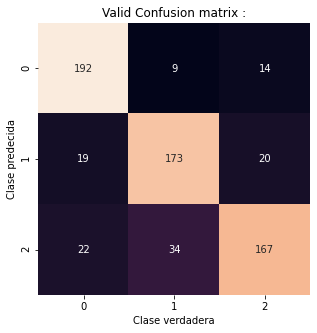

In [0]:
print("Valid accuracy: %.3f%%" % (acc_valid * 100))
write_cm(cm, "Valid Confusion matrix :")

Como podemos observar la presición de nuestro modelo ha mejorado significativamente, esto es debido a que al crear el árbol seleccionamos los mejores valores posibles para nuestro modelo.

Contestando la pregunta que nos hicimos anteriormente ¿Podemos predecir que alumnos consumen alcohol y en qué medida? Pues concluimos que si debido a que nuestro modelo predice con una presición bastante alta.  

<br>

## **Clasificador bayesiano**

El clasificador bayesiano es un modelo simple pero bastante optimo a la hora de clasificar pocos datos. ¿Cómo funciona?

Bueno el clasificador bayesiano supone que la presencia de una característica particular de una clase no esta relacionada con la presencia de ninguna otra característica. Es decir, auqnue las características dependan unas de otras el clasificador bayesiano utiliza todas estas propiedades para contribuir independientemente a la probabilidad de que el alumno se clasifique en un tipo de consumo de alcohol

###**Entrenamiento del clasificador bayesiano**

In [0]:
classifier_NB = GaussianNB()
classifier_NB.fit(pred_train, tar_train)
acc_gaussianNB_train = round(classifier_NB.score(pred_train, tar_train) * 100, 2)
acc_gaussianNB_val = round(classifier_NB.score(pred_val, tar_val) * 100, 2)


Mostramos los resultados del modelo

Train accuracy: 59.170%
Valid accuracy: 55.850%


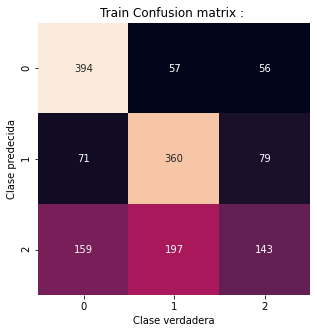

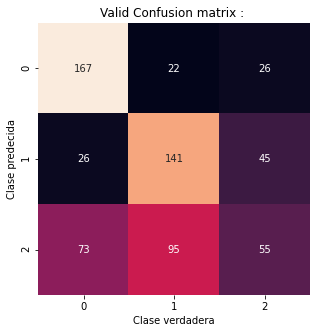

Train classification report:
              precision    recall  f1-score   support

        Alto       0.63      0.78      0.70       507
        Bajo       0.59      0.71      0.64       510
       Medio       0.51      0.29      0.37       499

    accuracy                           0.59      1516
   macro avg       0.58      0.59      0.57      1516
weighted avg       0.58      0.59      0.57      1516

Valid classification report:
              precision    recall  f1-score   support

        Alto       0.63      0.78      0.69       215
        Bajo       0.55      0.67      0.60       212
       Medio       0.44      0.25      0.32       223

    accuracy                           0.56       650
   macro avg       0.54      0.56      0.54       650
weighted avg       0.54      0.56      0.53       650



In [0]:
print("Train accuracy: %.3f%%" % acc_gaussianNB_train)
print("Valid accuracy: %.3f%%" % acc_gaussianNB_val)

y_pred_tar = classifier_NB.predict(pred_train)
y_pred_val = classifier_NB.predict(pred_val)


cm_train = confusion_matrix(tar_train, y_pred_tar)
write_cm(cm_train , "Train Confusion matrix : ")

cm_valid = confusion_matrix(tar_val, y_pred_val)
write_cm(cm_valid, "Valid Confusion matrix : ")

print("Train classification report:")
print(classification_report(tar_train, y_pred_tar))
print("Valid classification report:")
print(classification_report(tar_val, y_pred_val))

## Comparación de árbol de decisión y clasificador bayesiano

Bueno al final el mejor clasificador para nuestro conjunto de datos fue el árbol de decisión. Fue curioso que el clasificador bayesiano tuviera una diferencia tan abismal con el árbol de decisión, debido a lo comentado anteriormente.

# **Clustering**

## Algoritmo KMeans

Con el algoritmo de KMeans vamos a agrupar los datos teniendo en cuenta las variables que nosotros le indiquemos. 

El algoritmo KMeans lo que hace es agrupar cada objeto en el centroide más cercano, recalcularlo y repite este proceso n veces.


Para este apartado ejecutaremos el algoritmo Kmeans 3 veces con diferentes conjuntos de variables:

- freetime, goout
- freetime, G3
- traveltime, studytime, famrel, freetime, goout, G3

### Primeros pasos

Transformamos las los datos de la variable Class en datos numéricos para poder operarlos en los clustering. 

In [0]:
data_temp = final_data.copy()

for i in range(len(data_temp)):
  if (data_temp['Class'][i] == 'Alto'):
    data_temp['Class'][i] = 3
  elif (data_temp['Class'][i] == 'Medio'):
    data_temp['Class'][i] = 2
  else:
    data_temp['Class'][i] = 1

### Funciones 

El método de *elbow* nos permite calcular el mejor número de cluster

In [0]:
def elbow(data_kmeans, range_ini, range_fini):
  mms = MinMaxScaler()
  mms.fit(data_kmeans)
  data_transformed = mms.transform(data_kmeans)

  Sum_of_squared_distances = []
  K = list(range(range_ini, range_fini))
  for k in K:
    km = KMeans(n_clusters=k, max_iter = 500)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

  fig = go.Figure(data=go.Scatter(x=K, y=Sum_of_squared_distances))
  fig.update_layout(
      title="Gráfica Cálculo del mejor número de Clusters",
      xaxis_title="Number Of Custers",
      yaxis_title="Sum_of_squared_distances", 
  )

  fig.show()

Esta función nos ejecuta el Kmeans y nos devuelve el mejor kmeans

In [0]:
def kmeans_better_k(data_kmeans, k): 
  better_k = k
  kmeans = KMeans(n_clusters=better_k, random_state=0).fit(data_kmeans)

  return kmeans

___

### Freetime - Goout

#### Visualización previa

Vamos a hacer una visualización previa del algoritmo KMeans probando con un número de cluster con valor 3.


Creamos un dataset solo con las variables *freetime* y *goout*

In [0]:
data_means_1 = data_temp[['freetime', 'goout']]
data_means_1

freetime     goout
0     0.500000  0.750000
1     0.750000  0.500000
2     0.250000  0.000000
3     0.000000  0.250000
4     1.000000  1.000000
...        ...       ...
2161  0.415845  0.500000
2162  1.000000  1.000000
2163  0.750000  0.750000
2164  0.500000  0.358633
2165  0.500000  0.500000

[2166 rows x 2 columns]

Guardamos una lista con el grupo que le pertenece a cada objeto

In [0]:
labels_1 = kmeans_better_k(data_means_1, 3).labels_
labels_1

array([0, 1, 2, ..., 0, 1, 1], dtype=int32)

In [0]:
fig = px.scatter(final_data, x="goout", y="freetime", color=labels_1)
fig.show()

#### Cálculo del mejor número de clusters (K)

In [0]:
elbow(data_means_1, 1, 15)

> Vemos que la mejor K es 6 o 7

#### Visualización con el mejor número de clusters (K)

In [0]:
better_kmeans_1 = kmeans_better_k(data_means_1, 6)
labels_1 = better_kmeans_1.labels_

Vemos el valor de los centroides

In [0]:
better_kmeans_1.cluster_centers_

array([[0.14747138, 0.27816626],
       [0.74598113, 0.65594045],
       [0.61561541, 0.24341595],
       [0.46377917, 0.50573508],
       [0.42681396, 0.85035388],
       [0.87071379, 0.94455767]])

Resultado de los mejores agrupamientos para *freetime* y *goout*

In [0]:
fig = px.scatter(final_data, x="goout", y="freetime", color=labels_1)
fig.show()

Gráfica sin agrupamientos coloreada según el consumo de alcohol

In [0]:
fig = px.scatter(final_data, x="goout", y="freetime", color='Class')
fig.show()

Observando las dos gráficas, vemos que mientras los alumnos tienen más tiempo libre y salen más con amigos, su consumo suele ser mayor, esto no quiere decir que un alumnos con características opuestas no tenga un consumo de alcohol alto.

### Freetime - G3

Creamos un dataset solo con las variables *freetime* y *G3*

In [0]:
data_means_2 = data_temp[['freetime', 'G3']]
data_means_2

freetime        G3
0     0.500000  0.643917
1     0.750000  0.762611
2     0.250000  0.525223
3     0.000000  0.643917
4     1.000000  0.821958
...        ...       ...
2161  0.415845  0.782589
2162  1.000000  0.764507
2163  0.750000  0.584570
2164  0.500000  0.000000
2165  0.500000  0.821958

[2166 rows x 2 columns]

#### Cálculo del mejor número de clusters (K)

In [0]:
elbow(data_means_2, 1, 15)

> Vemos que la mejor K es 7 u 8

#### Visualización con el mejor número de clusters (K)

In [0]:
better_kmeans_2 = kmeans_better_k(data_means_2, 8)
labels_2 = better_kmeans_2.labels_

Vemos el valor de los centroides

In [0]:
better_kmeans_2.cluster_centers_

array([[0.78941347, 0.86821523],
       [0.49933714, 0.56684448],
       [0.51283351, 0.81053323],
       [0.14837898, 0.59462782],
       [0.64705756, 0.02827575],
       [0.9706044 , 0.53965638],
       [0.73891998, 0.58437421],
       [0.24999312, 0.87682841]])

Resultado de los mejores agrupamientos para *freetime* y *G3*

In [0]:
fig = px.scatter(final_data, x="freetime", y="G3", color=labels_2)
fig.show()

Gráfica sin agrupamientos coloreada según el consumo de alcohol

In [0]:
fig = px.scatter(final_data, x="freetime", y="G3", color='Class')
fig.show()

Observando las dos gráficas, vemos que mientras los alumnos tienen más tiempo libre y obtienen peores notas, su consumo suele ser mayor, esto no quiere decir que un alumnos con características opuestas no tenga un consumo de alcohol alto.

### Traveltime, studytime, famrel, freetime, goout, G3


En este punto utilizamos todas las variables continuas del conjunto de las mejores variables, las cuales son las que están como título de este punto

Creamos un dataset solo con este conjunto de variables

In [0]:
data_means_3 = data_temp[['traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'G3']]
data_means_3

traveltime  studytime    famrel  freetime     goout        G3
0       0.000000   0.666667  0.666667  0.500000  0.750000  0.643917
1       0.000000   0.666667  0.666667  0.750000  0.500000  0.762611
2       0.500000   0.000000  0.333333  0.250000  0.000000  0.525223
3       0.000000   0.666667  0.666667  0.000000  0.250000  0.643917
4       0.000000   1.000000  0.666667  1.000000  1.000000  0.821958
...          ...        ...       ...       ...       ...       ...
2161    0.331689   0.221126  0.666667  0.415845  0.500000  0.782589
2162    0.031951   0.000000  0.645366  1.000000  1.000000  0.764507
2163    0.498364   0.001090  0.666667  0.750000  0.750000  0.584570
2164    0.717266   0.000000  0.666667  0.500000  0.358633  0.000000
2165    0.000000   0.804707  0.569020  0.500000  0.500000  0.821958

[2166 rows x 6 columns]

#### Cálculo del mejor número de clusters (K)

In [0]:
elbow(data_means_3, 1, 15)

> Vemos que la mejor K es 7 u 8

#### Visualización con el mejor número de clusters (K)

In [0]:
better_kmeans_3 = kmeans_better_k(data_means_3, 8)
labels_3 = better_kmeans_3.labels_

Vemos el valor de los centroides

In [0]:
better_kmeans_3.cluster_centers_

array([[0.03092882, 0.21498706, 0.75542075, 0.66764473, 0.84115134,
        0.68977956],
       [0.04129671, 0.19383978, 0.30067339, 0.38293236, 0.51271845,
        0.58490994],
       [0.11373404, 0.73097281, 0.64478818, 0.51749874, 0.47507218,
        0.73711234],
       [0.67364767, 0.22094835, 0.71163167, 0.33082448, 0.36829039,
        0.64723661],
       [0.16985305, 0.20550318, 0.86079179, 0.79989523, 0.78114761,
        0.18127509],
       [0.02878816, 0.21335779, 0.76028956, 0.59256128, 0.39970287,
        0.70580727],
       [0.55025791, 0.22124727, 0.25042245, 0.57565654, 0.63685071,
        0.62141802],
       [0.63933221, 0.18421604, 0.73928964, 0.76776914, 0.82279434,
        0.59510789]])

Resultado de los mejores agrupamientos para *goout* y *G3*

In [0]:
fig = px.scatter(final_data, x="goout", y="freetime", color=labels_3)
fig.show()

Resultado de los mejores agrupamientos para *freetime* y *G3*

In [0]:
fig = px.scatter(final_data, x="freetime", y="G3", color=labels_3)
fig.show()

Se utiliza para graficar los mismos conjuntos de variables que se han utilizado en apartados anteriores, ya que no se puede visualizar con más de tres variables.

Pero en ambas gráficas vemos claramente que los agrupamientos para estas variables no quedan tan definidos como los anteriores casos y no se puede hacer relaciones con el consumo de alcohol de manera gráfica, ya que se toman en cuenta para la creación de los clusters 6 variables.

##**Clustering Jerárquico**



En clustering jerárquico existen dos tipos de cluster el de tipo aglomerativo y el de tipo divisible. Nosotros en el proyecto hemos utilizado el el de tipo aglomerativo que que agrupa desde cada elemento individual. Al principio cada cada dato está en un clúster independiente. A cada paso los clúster se van agrupando formando una jerarquía de cluster. Al final solo queda un clúster que los agrupa a todos

In [0]:
data_hierarchical = final_data.copy()

In [0]:
for i in range(len(data_hierarchical)):
  if (data_hierarchical['Class'][i] == 'Alto'):
    data_hierarchical['Class'][i] = 3
  elif (data_hierarchical['Class'][i] == 'Medio'):
    data_hierarchical['Class'][i] = 2
  else:
    data_hierarchical['Class'][i] = 1

In [0]:
data_hierarchical

sex   age  famsize      Medu  ...    health  absences        G3  Class
0     1.0  1.00      1.0  0.333333  ...  0.500000     0.250  0.643917      1
1     1.0  0.50      1.0  1.000000  ...  0.750000     0.000  0.762611      1
2     0.0  1.00      1.0  0.666667  ...  0.500000     0.250  0.525223      1
3     1.0  0.25      1.0  0.666667  ...  0.250000     0.250  0.643917      1
4     1.0  0.75      1.0  0.333333  ...  0.250000     0.250  0.821958      1
...   ...   ...      ...       ...  ...       ...       ...       ...    ...
2161  1.0  0.50      1.0  1.000000  ...  1.000000     0.125  0.782589      1
2162  1.0  0.75      1.0  0.666667  ...  0.000000     0.250  0.764507      1
2163  1.0  0.50      1.0  0.000000  ...  1.000000     0.000  0.584570      1
2164  1.0  0.75      1.0  0.333333  ...  0.891367     0.000  0.000000      1
2165  1.0  0.25      1.0  1.000000  ...  0.426765     0.625  0.821958      1

[2166 rows x 15 columns]

Lo primero que vamos a realizar en el cluster jerárquico es ver como vamos a definir la distancia entre clúster para ello hay diversos tipos de distancia

Vamos a generar los dendogramas con estos tipos de distancia y con el coeficiente de cophenetic vamos a ver cual agrupa mejor los datos en cluster.


In [0]:
plt.rcParams["figure.figsize"] = (15, 5)

### Single

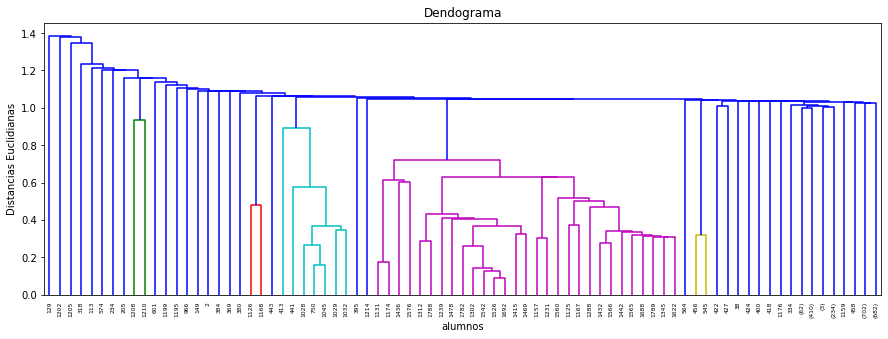

In [0]:
dendrogram_single = sch.dendrogram(sch.linkage(data_hierarchical, method = 'single'), p=35, truncate_mode='level')

plt.title('Dendograma')
plt.xlabel('alumnos')
plt.ylabel('Distancias Euclidianas')
plt.show()

### Complete

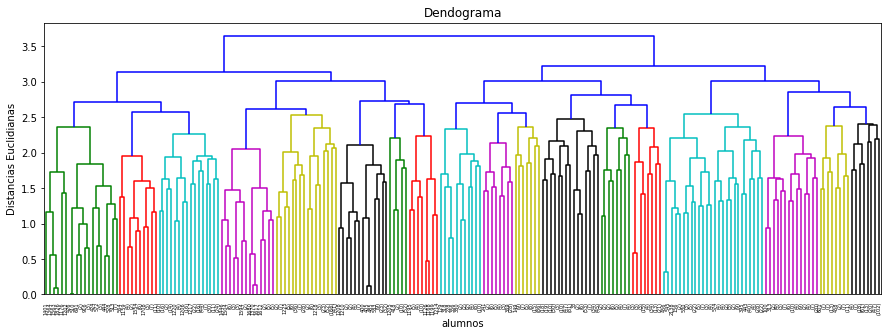

In [0]:
dendrogram_complete = sch.dendrogram(sch.linkage(data_hierarchical, method = 'complete'), p=7, truncate_mode='level')

plt.title('Dendograma')
plt.xlabel('alumnos')
plt.ylabel('Distancias Euclidianas')
plt.show()

### Average

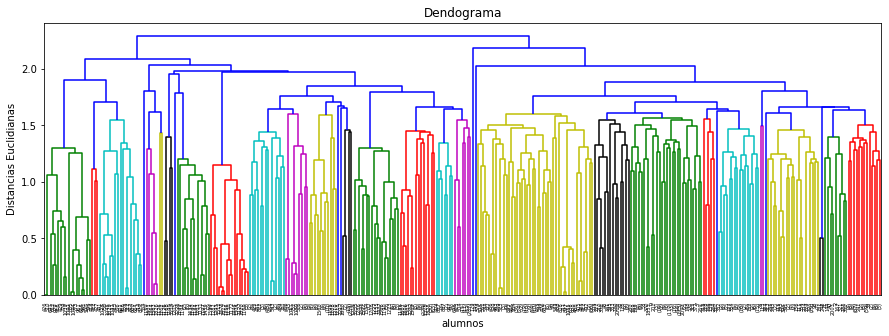

In [0]:
dendrogram_average = sch.dendrogram(sch.linkage(data_hierarchical, method = 'average'), p=11, truncate_mode='level')

plt.title('Dendograma')
plt.xlabel('alumnos')
plt.ylabel('Distancias Euclidianas')
plt.show()

### Centroide

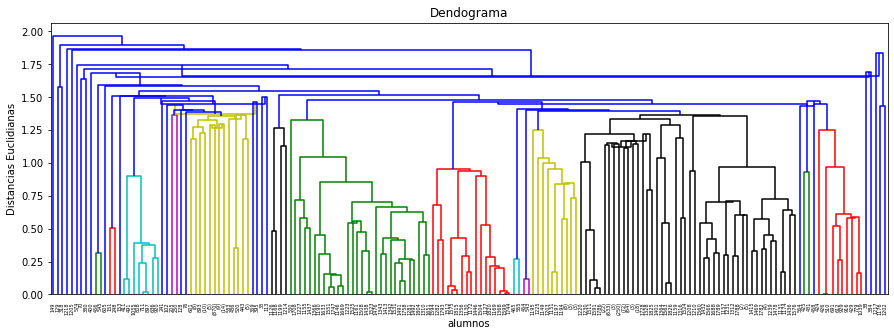

In [0]:
dendrogram_centroid = sch.dendrogram(sch.linkage(data_hierarchical, method = 'centroid'), p=25, truncate_mode='level')

plt.title('Dendograma')
plt.xlabel('alumnos')
plt.ylabel('Distancias Euclidianas')
plt.show()

### Ward

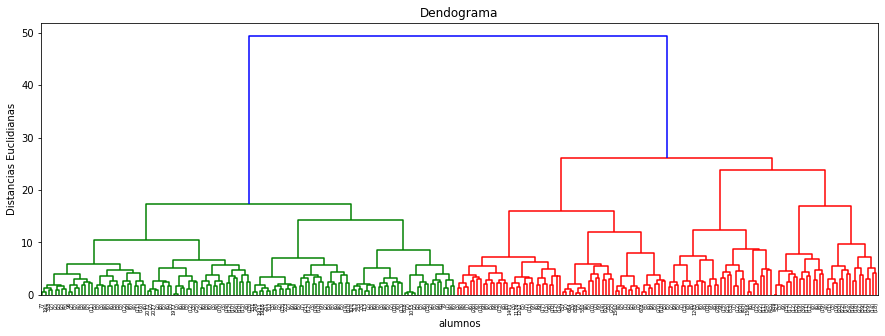

In [0]:
# Creamos el dendograma para encontrar el número óptimo de clusters

dendrogram_ward = sch.dendrogram(sch.linkage(data_hierarchical, method = 'ward'), p=7, truncate_mode='level')
plt.title('Dendograma')
plt.xlabel('alumnos')
plt.ylabel('Distancias Euclidianas')
plt.show()

### Comparación de modelos

In [0]:
Y = pairwise_distances(data_hierarchical, metric="euclidean")
Z_single = linkage(data_hierarchical, method='single')
Z_complete = linkage(data_hierarchical, method='complete')
Z_average = linkage(data_hierarchical, method='average')
Z_centroid = linkage(data_hierarchical, method='centroid')
Z_ward = linkage(data_hierarchical, method='ward')

In [0]:
CorrCoeff , coph_dists = cophenet(Z_single, pdist(Y))
print("single: ", CorrCoeff)
CorrCoeff , coph_dists = cophenet(Z_complete, pdist(Y))
print("complete: ", CorrCoeff)
CorrCoeff , coph_dists = cophenet(Z_average, pdist(Y))
print("average: ", CorrCoeff)
CorrCoeff , coph_dists = cophenet(Z_centroid, pdist(Y))
print("centroid: ", CorrCoeff)
CorrCoeff , coph_dists = cophenet(Z_ward, pdist(Y))
print("ward: ", CorrCoeff)


single:  0.5470500202820734
complete:  0.6454101556112725
average:  0.733702375361185
centroid:  0.6884576477815908
ward:  0.735124560619749


Podemos ver que el mejor modelo es Ward 

Una vez seleccionamos el tipo de distancia entre los clusters vamos a elegir el numero de clúster que le vamos a proporcionar a nuestro cluster jerárquico aglomerativo y ver como agrupa los diferentes datos en cada cluster correspondiente.

El número de cluster se cálcula ha criterio del experto sobre el dendograma. Como podemos ver nuestro en nuestro dendograma la distancia máxima viene dada por la linea azul de la izquierda, por lo que vamos a cortar nuestro modelo a esa distáncia

Fancy_dendogram es un método que te permite a parte de visualizar el dendograma, trazar una línea de corte por donde vas a cortar la distancia para ver con cuantos agrupamientos nos quedamos.

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

### Dendograma con mejor modelo

Creamos el dendograma con el mejor tipo de distancia que en este caso es Ward y visualizamos la línea de corte

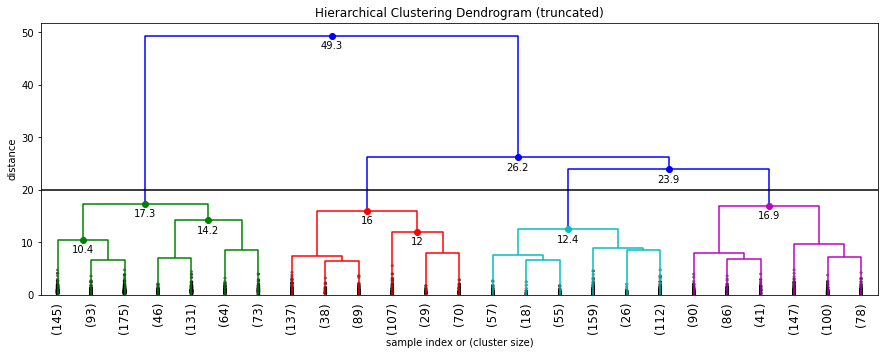

In [0]:
fancy_dendrogram(
    Z_ward,
    truncate_mode='lastp',
    p=25,
    max_d=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

Una vez cortado este modelo a esa distancia nos quedamos con 4 tipos de clúster. 

Vamos a visualizar como agrupa los datos de nuestro dataset en los 4 agrupamientos.

In [0]:
max_d = 20
clusters = fcluster(Z_ward, max_d, criterion='distance')
clusters[1700:2000]

array([2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2,
       3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [0]:
for i in range(1,5):
  print('El cluster ', i, ' tiene ', np.count_nonzero(clusters == i), ' puntos')

El cluster  1  tiene  727  puntos
El cluster  2  tiene  470  puntos
El cluster  3  tiene  427  puntos
El cluster  4  tiene  542  puntos


## Comparación de Kmeans y Jerárquico

A la hora de trabajar con grandes cantidades de datos el algoritmo Kmeans tiene mejores resultados que el jerárquico, ya que tiene una complejidad lineal, $O (n)$, mientras que la complejidad del jerárquico es cuadrática, $O (n^2)$.

En nuestro caso, al no tener una gran cantidad de datos (alrededor de 2000) podemos obviar la complejidad del algoritmo. Además nuestro conjunto de datos cuenta con muchas variables no continuas y el algoritmo de **Kmeans** no trabaja bien con ese tipo de datos. En cambio, el algortimo de **cluster jerárquico** es capaz de crear agrupamientos con este tipo de variables.

Otro detalle, es que en el cluster jerárquico no tenemos que definir el número de cluster de entrada, sino que una vez visulaizados los datos agrupados en el dendograma, podemos decidir con que número de cluster es mejor.

Por lo tanto, en nuestro caso consideramos que es mejor el cluster jerárquico por el tipo y cantidad de nuestros datos.

# **Conclusión**

## Consumición en hombres y mujeres

In [0]:
data_draw = final_data.copy()

df_bajo = data_draw[data_draw.Class == 'Bajo']
df_medio = data_draw[data_draw.Class == 'Medio']
df_alto = data_draw[data_draw.Class == 'Alto']

hombres_bajo = len(df_bajo[df_bajo.sex == 0])
mujeres_bajo = len(df_bajo[df_bajo.sex == 1])

hombres_medio = len(df_medio[df_medio.sex == 0])
mujeres_medio = len(df_medio[df_medio.sex == 1])

hombres_alto = len(df_alto[df_alto.sex == 0])
mujeres_alto = len(df_alto[df_alto.sex == 1])

hombres_medio
#number_of_cebos = int(dataframe['sex'].value_counts()[0])
nombres=['Bajo', 'Medio', 'Alto']

#
fig = go.Figure(data=[
    go.Bar(name='Hombres', x=nombres, y=[hombres_bajo, hombres_medio, hombres_alto]),
    go.Bar(name='Mujeres', x=nombres, y=[mujeres_bajo, mujeres_medio, mujeres_alto])
])


fig.update_layout(    
    title="Relación entre el género y consumo de alcohol",
    xaxis_title="Consumo de alcohol",
    yaxis_title="Total alumnos", 
    barmode='group'
)
fig.show()


Podemos ver que en el caso de las mujeres suelen hacer un cosumo de alcohol bajo o nulo, por lo contrario los hombres hacen un consumo mayor de alcohol.

## Consumición según los estudios del padre

In [0]:
data_draw = data_equiv3.copy()

df_bajo = data_draw[data_draw.Class == 'Bajo']
df_medio = data_draw[data_draw.Class == 'Medio']
df_alto = data_draw[data_draw.Class == 'Alto']

NoneF_bajo = len(df_bajo[df_bajo.Fedu == 0])
PrimariaF_bajo = len(df_bajo[df_bajo.Fedu == 1])
PostPrimariaF_bajo = len(df_bajo[df_bajo.Fedu == 2])
SecundariaF_bajo = len(df_bajo[df_bajo.Fedu == 3])
UniversidadF_bajo = len(df_bajo[df_bajo.Fedu == 4])

NoneF_medio = len(df_medio[df_medio.Fedu == 0])
PrimariaF_medio = len(df_medio[df_medio.Fedu == 1])
PostPrimariaF_medio = len(df_medio[df_medio.Fedu == 2])
SecundariaF_medio = len(df_medio[df_medio.Fedu == 3])
UniversidadF_medio = len(df_medio[df_medio.Fedu == 4])

NoneF_alto = len(df_alto[df_alto.Fedu == 0])
PrimariaF_alto = len(df_alto[df_alto.Fedu == 1])
PostPrimariaF_alto = len(df_alto[df_alto.Fedu == 2])
SecundariaF_alto = len(df_alto[df_alto.Fedu == 3])
UniversidadF_alto = len(df_alto[df_alto.Fedu == 4])

nombres=['Nada', 'Primaria', 'Post-Primaria', 'Secundaria', 'Universidad']

fig = go.Figure(data=[
    go.Bar(name='Bajo', x=nombres, y=[NoneF_bajo, PrimariaF_bajo, PostPrimariaF_bajo, SecundariaF_bajo, UniversidadF_bajo]),
    go.Bar(name='Medio', x=nombres, y=[NoneF_medio, PrimariaF_medio, PostPrimariaF_medio, SecundariaF_medio, UniversidadF_medio]),
    go.Bar(name='Alto', x=nombres, y=[NoneF_alto, PrimariaF_alto, PostPrimariaF_alto, SecundariaF_alto, UniversidadF_alto]),
])

fig.update_layout(    
  title="Relación entre los estudios padre y consumo de alcohol de sus hijos",
  xaxis_title="Estudios de el padre",
  yaxis_title="Total alumnos", 
  barmode='group'
)

fig.show()

Observando esta gráfica, podemos ver que cuanto mayor sea el nivel de estudios del padre, el consumo de alcohol de sus hijos suele ser menor.

## Consumición según los estudios de la madre

In [0]:
data_draw = data_equiv3.copy()

df_bajo = data_draw[data_draw.Class == 'Bajo']
df_medio = data_draw[data_draw.Class == 'Medio']
df_alto = data_draw[data_draw.Class == 'Alto']

NoneD_bajo = len(df_bajo[df_bajo.Medu == 0])
PrimariaD_bajo = len(df_bajo[df_bajo.Medu == 1])
PostPrimariaD_bajo = len(df_bajo[df_bajo.Medu == 2])
SecundariaD_bajo = len(df_bajo[df_bajo.Medu == 3])
UniversidadD_bajo = len(df_bajo[df_bajo.Medu == 4])

NoneD_medio = len(df_medio[df_medio.Medu == 0])
PrimariaD_medio = len(df_medio[df_medio.Medu == 1])
PostPrimariaD_medio = len(df_medio[df_medio.Medu == 2])
SecundariaD_medio = len(df_medio[df_medio.Medu == 3])
UniversidadD_medio = len(df_medio[df_medio.Medu == 4])

NoneD_alto = len(df_alto[df_alto.Medu == 0])
PrimariaD_alto = len(df_alto[df_alto.Medu == 1])
PostPrimariaD_alto = len(df_alto[df_alto.Medu == 2])
SecundariaD_alto = len(df_alto[df_alto.Medu == 3])
UniversidadD_alto = len(df_alto[df_alto.Medu == 4])


nombres=['Nada', 'Primaria', 'Post-Primaria', 'Secundaria', 'Universidad']


fig = go.Figure(data=[
    go.Bar(name='Bajo', x=nombres, y=[NoneD_bajo, PrimariaD_bajo, PostPrimariaD_bajo, SecundariaD_bajo, UniversidadD_bajo]),
    go.Bar(name='Medio', x=nombres, y=[NoneD_medio, PrimariaD_medio, PostPrimariaD_medio, SecundariaD_medio, UniversidadD_medio]),
    go.Bar(name='Alto', x=nombres, y=[NoneD_alto, PrimariaD_alto, PostPrimariaD_alto, SecundariaD_alto, UniversidadD_alto]),
])

fig.update_layout(    
      title="Relación entre los estudios madre y consumo de alcohol de sus hijos",
      xaxis_title="Estudios de la madre",
      yaxis_title="Total alumnos", 
      barmode='group'
  )

fig.show()

Al contrario de la gráfica anterior, podemos ver que cuanto mayor sea el nivel de estudios del madre, el consumo de alcohol de sus hijos suele ser mayor.

> Observando los resultados de estas dos gráficas, tanto estudios de la madre como del padre, vemos que hay una contradicción, ya que mientras los estudios del padre son mayores, el consumo del hijo es **menor** y si los estudios de la madre son mayores, el consumo de este es **mayor**. 

## Consumición según el tiempo de estudio

In [0]:
data_draw = data_equiv.copy()

df_bajo = data_draw[data_draw.Class == 'Bajo']
df_medio = data_draw[data_draw.Class == 'Medio']
df_alto = data_draw[data_draw.Class == 'Alto']

study_bajo1 = len(df_bajo[df_bajo.studytime <= 1])
study_bajo2 = len(df_bajo[df_bajo.studytime <= 2.5]) - len(df_bajo[df_bajo.studytime <= 1])
study_bajo3 = len(df_bajo[df_bajo.studytime <= 4]) - len(df_bajo[df_bajo.studytime <= 2.5])

study_medio1 = len(df_medio[df_medio.studytime <= 1])
study_medio2 = len(df_medio[df_medio.studytime <= 2.5]) - len(df_medio[df_medio.studytime <= 1])
study_medio3 = len(df_medio[df_medio.studytime <= 4]) - len(df_medio[df_medio.studytime <= 2.5])

study_alto1 = len(df_alto[df_alto.studytime <=1])
study_alto2 = len(df_alto[df_alto.studytime <=2.5]) - len(df_alto[df_alto.studytime <=1])
study_alto3 = len(df_alto[df_alto.studytime <=4]) - len(df_alto[df_alto.studytime <=2.5])

nombres=['estudia_poco', 'estudia_regular', 'estudia_mucho']


fig = go.Figure(data=[
    go.Bar(name='Bajo', x=nombres, y=[study_bajo1,study_medio1,study_alto1]),
    go.Bar(name='Medio', x=nombres, y=[study_bajo2,study_medio2,study_alto2]),
    go.Bar(name='Alto', x=nombres, y=[study_bajo3,study_medio3,study_alto3])
])

fig.update_layout(    
      title="Relación entre el tiempo de estudio y consumo de alcohol",
      xaxis_title="Tiempo de estudio",
      yaxis_title="Total alumnos", 
      barmode='group'
)
fig.show()

En este caso se ve claramente que los alumnos que más estudian hacen un consumo menor de alcohol.

## Consumición según las faltas a la escuela

In [0]:
data_draw = data_equiv3.copy()

df_bajo = data_draw[data_draw.Class == 'Bajo']
df_medio = data_draw[data_draw.Class == 'Medio']
df_alto = data_draw[data_draw.Class == 'Alto']

faltas_bajo1 = len(df_bajo[df_bajo.absences <= 2])
faltas_bajo2 = len(df_bajo[df_bajo.absences <= 6]) - len(df_bajo[df_bajo.absences <= 2])
faltas_bajo3 = len(df_bajo[df_bajo.absences >= 6])

faltas_medio1 = len(df_medio[df_medio.absences <= 2])
faltas_medio2 = len(df_medio[df_medio.absences <= 6]) - len(df_medio[df_medio.absences <= 2])
faltas_medio3 = len(df_medio[df_medio.absences >= 6])

faltas_alto1 = len(df_alto[df_alto.absences <=2])
faltas_alto2 = len(df_alto[df_alto.absences <=6]) - len(df_alto[df_alto.absences <=2])
faltas_alto3 = len(df_alto[df_alto.absences >=6]) 

nombres=['falta_poco', 'falta_regular', 'falta_mucho']


fig = go.Figure(data=[
    go.Bar(name='Bajo', x=nombres, y=[faltas_bajo1,faltas_medio1,faltas_alto1]),
    go.Bar(name='Medio', x=nombres, y=[faltas_bajo2,faltas_medio2,faltas_alto2]),
    go.Bar(name='Alto', x=nombres, y=[faltas_bajo3,faltas_medio3,faltas_alto3])
])

fig.update_layout(    
    title="Relación entre las faltas a clase y consumo de alcohol",
    xaxis_title="Faltas a clase",
    yaxis_title="Total alumnos", 
    barmode='group'
)
fig.show()

Vemos que los alumnos más faltan a la escuela hacen un consumo mayor de alcohol.

## Consumición de alcohol según la edad

In [0]:
data_draw = data_equiv3.copy()

df_bajo = data_draw[data_draw.Class == 'Bajo']
df_medio = data_draw[data_draw.Class == 'Medio']
df_alto = data_draw[data_draw.Class == 'Alto']

age_15_bajo = len(df_bajo[df_bajo.age == 15])
age_16_bajo = len(df_bajo[df_bajo.age == 16])
age_17_bajo = len(df_bajo[df_bajo.age == 17])
age_18_bajo = len(df_bajo[df_bajo.age == 18])
age_19_bajo = len(df_bajo[df_bajo.age == 19])

age_15_medio = len(df_medio[df_medio.age == 15])
age_16_medio = len(df_medio[df_medio.age == 16])
age_17_medio = len(df_medio[df_medio.age == 17])
age_18_medio = len(df_medio[df_medio.age == 18])
age_19_medio = len(df_medio[df_medio.age == 19])

age_15_alto = len(df_alto[df_alto.age == 15])
age_16_alto = len(df_alto[df_alto.age == 16])
age_17_alto = len(df_alto[df_alto.age == 17])
age_18_alto = len(df_alto[df_alto.age == 18])
age_19_alto = len(df_alto[df_alto.age == 19])


nombres=['15', '16', '17', '18', '19']


fig = go.Figure(data=[
    go.Bar(name='Bajo', x=nombres, y=[age_15_bajo, age_16_bajo, age_17_bajo, age_18_bajo, age_19_bajo]),
    go.Bar(name='Medio', x=nombres, y=[age_15_medio, age_16_medio, age_17_medio, age_18_medio, age_19_medio]),
    go.Bar(name='Alto', x=nombres, y=[age_15_alto, age_16_alto, age_17_alto, age_18_alto, age_19_alto]),
])

fig.update_layout(    
      title="Relación entre la edad y consumo de alcohol",
      xaxis_title="Edades de los estudiantes",
      yaxis_title="Total alumnos", 
      barmode='group'
  )

fig.show()

Por último, si nos fijamos en las edades, vemos que los estudiantes de 17 años son los que más alcohol consumen, por lo tanto mientras más edad, más consumo. Esto es debido a que generalmente el colegio se suele terminar con una edad de 17 años y algunos con 18, por lo que vemos que hay menor cantidad de gente en 18 y 19 años.

Esto se puede ver reflejado en la proporción de los alumnos de 19 años que aunque sean menos cantidad de alumnos, estos suelen tener un consumo alto.

___
___
___

## Conclusiones finales

Vemos que en las ditintas gráficas que se han elaborado, las relaciones que se establecen, siendo
las características más determinantes para decidir si un alumno consume alcohol son el **sexo** y la **edad**, siendo los hombres y la edad de 17 años la de mayor consumo. Además, otras relaciones como mientras más **faltas al colegio** o **menos tiempo de estudio**, son tendencias a un mayor consumo de alcohol. En cambio, podemos darnos cuenta que variables como las **relaciones amorosas**, la **relación de los padres** y el **tutor del estudiante** que en un principio considerabamos importantes no son determinantes para el consumo del alcohol.

Al utilizar una tecnología como python, un lenguaje que no habiamos usado anteriormente y del cual no contabamos con tantos ejemplos, hemos dedicado gran parte del tiempo a investigar en buscar los distintos algoritmos o equivalencias entre r y python. Esta alternativa de lenguaje la escogimos, ya que es lenguaje muy popular y utilizado en el tratamiento de datos y eso nos ha hecho profundizar en los conceptos vistos en clase.

Entre las soluciones que proponemos estan:

* Ocupar el tiempo libre con actividades extracurriculares puede ayudar a reducir el consumo de alcohol, pero esto no implica que no disponer de tiempo libre tenga un consumo bajo.
* Dedicar más tiempo a horas estudio, ya que es una buena manera de ocupar el tiempo que posiblemente implique un mejor rendimiento académico.
* Asistir a clases que es un entorno controlado, evita que los alumnos caigan en estos vicios.

# Bibliografía

**Librerias**  

[Scikit-learn](https://scikit-learn.org/stable/)  
[Pandas](https://pandas.pydata.org/docs/reference/index.html)  
[Plotly python](https://plotly.com/python/)  
[Matplotlib](https://matplotlib.org/)  

**Otras funtes**

[Árbol de decisión](https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/)  
[RandomForest](https://medium.com/@Synced/how-random-forest-algorithm-works-in-machine-learning-3c0fe15b6674)  

[Clasificador Bayesiano](https://www.jacobsoft.com.mx/es_mx/clasificador-naive-bayes/)  
[K-means](https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/)  

[Clustering Jerárquico](https://www.jacobsoft.com.mx/es_mx/clustering-jerarquico-con-python/)  
[Clustering Jerárquico 2](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)  



**Libros**

Notebooks de la asignatura
